# Linear regression

Estimation

Evaluating fit

- RSE 

- R2

Residual standard error

- The RSE is 3.25, which implies that our estimates deviate about 3.25 from the actual values (this would be true even if we knew the population parameters, as the RSE is an estimate of the error standard deviation). Given the average value of sales, the percentage error is about 12 percent. Whether this is a lot or not depends on the application. 

- Becaue the RSE is an absolute measure of lack of fit, expressed in units of y, it's not always easy to interpret whether a given RSE is small or large.



$R^2$

- $R^2$, which is a relative measure of lack of fit, and measures the percentage of variance in y that the model can explain (and is thus always between 0 and 1). In the simple linear regression setting, $R^2 = Cor(X, Y)^2$.

- A low $R^2$ can mean that the true relationship is non-linear or that the error variance is very high or both. What constitutes "low" depends on the application.

- In the model above, more than 90 percent of the variation is explained by the set of explanatory variables.

Questions of interest

Is at least one of the predictors useful in explaining y?

- To test whether at least one of the predictors is useful in predicting the response, we can look at the reported F statistic.

In [25]:
res.fvalue, res.f_pvalue

(570.2707036590942, 1.575227256092437e-96)

- To test whether a subset of parameters is useful, we can run our own F-test. To manually test for all parameters, we can use:

In [32]:
a = np.identity(len(res.params))[1:]
res.f_test(a)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[570.27070366]]), p=1.5752272560925203e-96, df_denom=196, df_num=3>

- Which is equivalent to the statistic provided in the output. To test the (joint) usefulness of radio and newspaper, we can use:

In [40]:
a = np.identity(len(res.params))[[2, 3]]
res.f_test(a)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[272.04067681]]), p=2.829486915701129e-57, df_denom=196, df_num=2>

- Remember: the F statistic is valuable because irrespective of $p$, there is only a 5 percent change that the p-value is below 0.05. In contrast, individual predictors each have that probability, so for a large number of predictors, it's very likely that we observe significant ones solely due to chance.

Are all of the predictors or only a subset useful in explaining y?

## Application

In [7]:
path = 'http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv'
cols = ['TV', 'radio', 'newspaper', 'sales']
df = pd.read_csv(path, usecols=cols).rename(lambda x: x.lower(), axis=1)
print(df.shape)
df.head(1)

(200, 4)


,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1


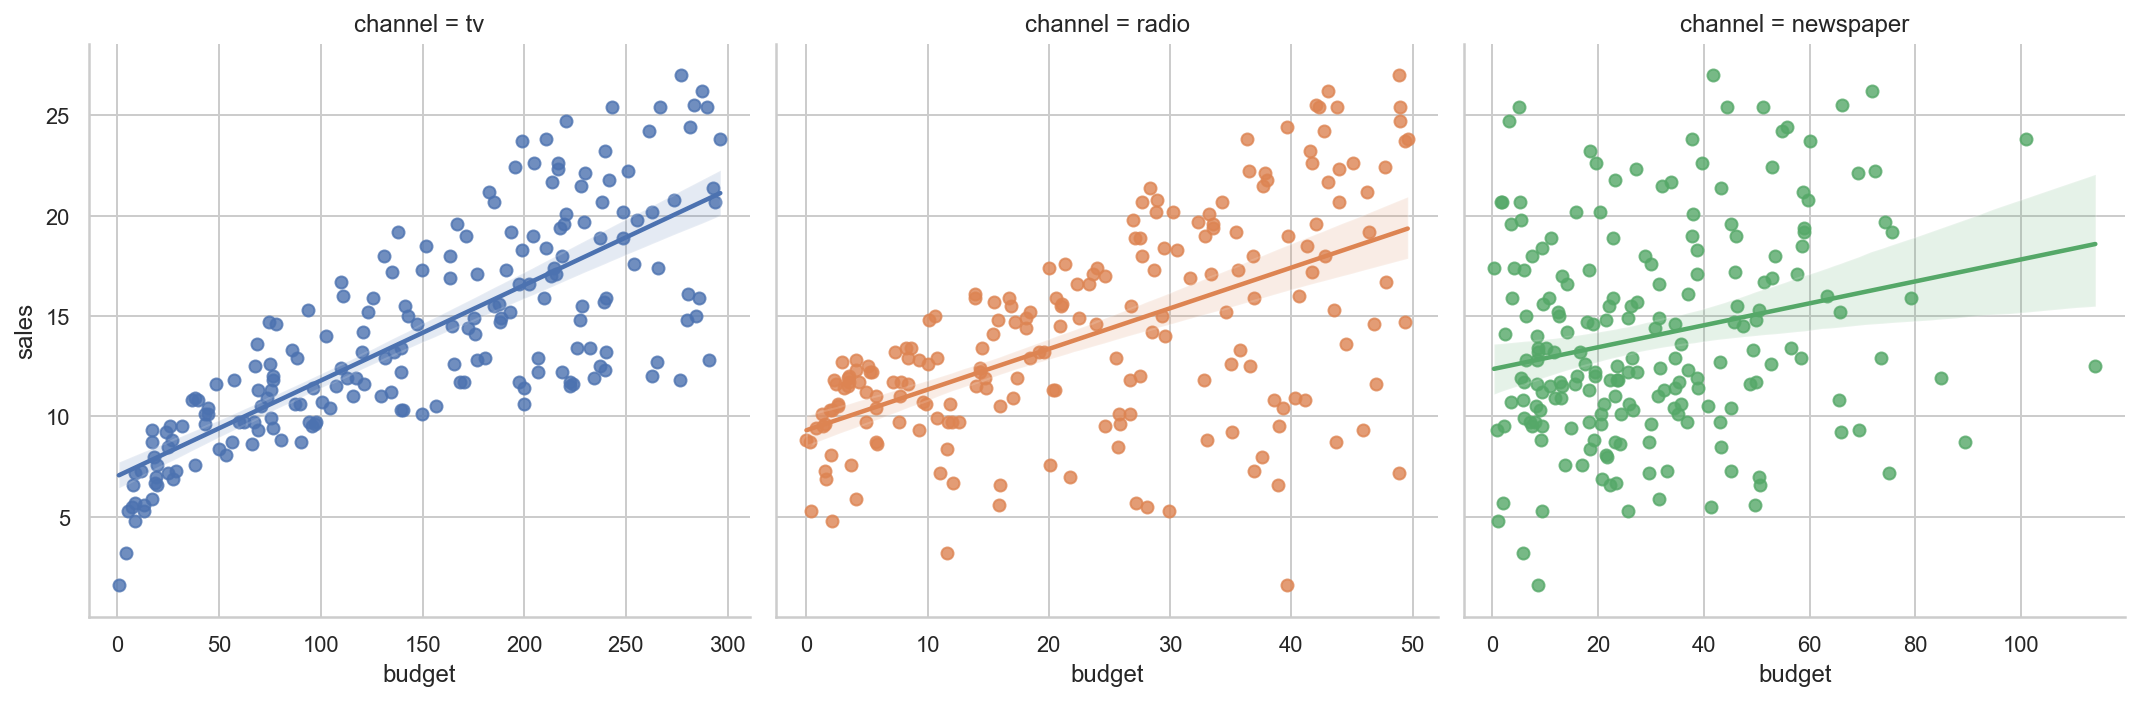

In [9]:
# Inspect data

tidy = (df.reset_index()
        .rename(columns={'index': 'market'})
        .melt(id_vars=['market', 'sales'],
              var_name='channel', 
              value_name='budget'))

sns.lmplot(x='budget', y='sales', hue='channel', col='channel',
           sharex=False, data=tidy);

In [10]:
# Estimate

mod = sm.OLS.from_formula('sales ~ tv + radio + newspaper', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 26 May 2020   Prob (F-statistic):           1.58e-96
Time:                        10:41:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [12]:
# Overal fit

rse = np.sqrt(res.scale)
x_mean = df.sales.mean()

print(rse)
print(rse/ x_mean)
print(res.rsquared)

1.685510373414744
0.1202004188564624
0.8972106381789522


- The RSE is 3.25, which implies that our estimates deviate about 3.25 from the actual values (this would be true even if we knew the population parameters, as the RSE is an estimate of the error standard deviation). Given the average value of sales, the percentage error is about 12 percent. Whether this is a lot or not depends on the application.

- Becaue the RSE is an absolute measure of lack of fit, expressed in units of y, it's not always easy to interpret whether a given RSE is small or large.

- $R^2$, which is a relative measure of lack of fit, and measures the percentage of variance in y that the model can explain (and is thus always between 0 and 1). In the simple linear regression setting, $R^2 = Cor(X, Y)^2$. 

- A low $R^2$ can mean that the true relationship is non-linear or that the error variance is very high or both. What constitutes "low" depends on the application.

- In the model above, more than 90 percent of the variation is explained by the set of explanatory variables.


In [13]:
# Is at least one of the predictors useful in explaining y?

res.fvalue, res.f_pvalue

(570.2707036590942, 1.575227256092437e-96)

In [14]:
# Is a subset of predictors useful?

a = np.identity(len(res.params))[[2, 3]]
res.f_test(a)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[272.04067681]]), p=2.829486915701129e-57, df_denom=196, df_num=2>

Remember: the F statistic is valuable because irrespective of $p$, there is only a 5 percent change that the p-value is below 0.05. In contrast, individual predictors each have that probability, so for a large number of predictors, it's very likely that we observe significant ones solely due to chance.